In [1]:
# import libraries
import json
import pandas as pd
import os
import shutil 
import numpy as np
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Sila_Sveta

/content/drive/MyDrive/Sila_Sveta


In [4]:
# откроем json файл в виде словаря
with open('data.json') as handle:
    dict_sila = json.loads(handle.read())

In [5]:
# видим, что внутри json есть разделение на train/test
dict_sila.keys()

dict_keys(['initial_bundle', 'test_bundle'])

In [6]:
len(dict_sila['initial_bundle']), len(dict_sila['test_bundle'])

(1558, 1545)

## Split dict to train/test and make 2 DataFrames

In [ ]:
# создаем train DataFrame и записываем туда значения из initial_bundle
train = []
for i in range(0,1558):
  train.append(list(dict_sila.values())[0][i])

df_train = pd.DataFrame(train)

In [ ]:
df_train

,id,type,category,subcategory,tags,file
0,2703,"{'id': 20, 'name': 'Showcase & Finals'}","{'id': 133, 'name': 'Installations', 'type': {...",None,"[2022, doha, fan, fifa, fooball, qatar, zone]",data/bf0d8c12-950b-4760-8deb-3a562cd7fe5b.jpg
1,3337,"{'id': 2, 'name': 'Textures'}","{'id': 175, 'name': 'cyber', 'type': {'id': 2,...",None,"[cyber, cyberpunk, neon, pixel, sign]",data/021d56b2-305b-443a-b45b-17ca7eafc3e9.jpg
2,2974,"{'id': 1, 'name': '3D Models'}","{'id': 4, 'name': 'Buildings', 'type': {'id': ...","{'id': 51, 'name': 'Destroyed', 'category': {'...","[castle, ruine, stone, wall]",data/9c3909df-21d4-4e84-805d-ade67f2df990.png
3,1207,"{'id': 3, 'name': 'HDRI'}","{'id': 112, 'name': 'Light Textures', 'type': ...","{'id': 149, 'name': 'Lamps', 'category': {'id'...","[lamps, red, round, studios]",data/cd06f94b-179e-4634-87eb-d1b77cd06bfe.jpg
4,1151,"{'id': 3, 'name': 'HDRI'}","{'id': 112, 'name': 'Light Textures', 'type': ...","{'id': 148, 'name': 'Softbox', 'category': {'i...","[rectangle, softbox, studios, warm]",data/e0734308-0fe8-4145-a968-17039966b48c.jpg
...,...,...,...,...,...,...
1553,1082,"{'id': 3, 'name': 'HDRI'}","{'id': 112, 'name': 'Light Textures', 'type': ...","{'id': 148, 'name': 'Softbox', 'category': {'i...","[rectangle, softbox, studios, warm]",data/d11a3894-5706-4c91-881b-bedcde2c335b.jpg
1554,1063,"{'id': 3, 'name': 'HDRI'}","{'id': 112, 'name': 'Light Textures', 'type': ...","{'id': 149, 'name': 'Lamps', 'category': {'id'...","[lamps, round, studios]",data/b9c26911-e5dd-4dcf-8f53-de751e734fb5.jpg
1555,2241,"{'id': 1, 'name': '3D Models'}","{'id': 146, 'name': 'Architecture', 'type': {'...","{'id': 171, 'name': 'Sculpture', 'category': {...","[ancient, archaeology, egypt, history, mytholo...",data/9680d0ca-e9fa-4622-a047-e167fe09a6e6.png
1556,1212,"{'id': 3, 'name': 'HDRI'}","{'id': 112, 'name': 'Light Textures', 'type': ...","{'id': 149, 'name': 'Lamps', 'category': {'id'...","[lamp, neutral, round, studios]",data/c9dedb35-b2f8-4ed6-ae4c-87e156f22ee8.jpg


In [ ]:
# вытащим значения type name и category name
df_train['type_id'] = df_train['type'].map(lambda x: x['id'])
df_train['type_name'] = df_train['type'].map(lambda x: x['name'])
df_train['category_id'] = df_train['category'].map(lambda x: x['id'])
df_train['category_name'] = df_train['category'].map(lambda x: x['name'])

In [ ]:
df_train.category_name.value_counts()

Light Textures    210
Vehicles          175
Plants            150
Explosions         74
Other              72
                 ... 
Impulse             1
Animals             1
Clouds              1
LED Facades         1
Wipe Mark           1
Name: category_name, Length: 73, dtype: int64

In [ ]:
#записываем машины и растения в отдельный датасет 
req_train = df_train[(df_train['category_name'] == 'Vehicles') | (df_train['category_name'] == 'Plants')]

In [ ]:
#удалаяем из df_train данные о машинах и растениях
df_train = df_train.drop(req_train.index.tolist(), axis=0)

In [7]:
# Делаем то же самое для тестовой части
test = []
for j in range(0, 1545):
  test.append(list(dict_sila.values())[1][j])

df_test = pd.DataFrame(test)

In [8]:
df_test[df_test['category'].isna()]

,id,type,category,subcategory,tags,file
500,155,"{'id': 13, 'name': 'Houdini Assets'}",None,None,"[helix, houdini]",data/3586ff8d-98c4-4480-a644-63e43e120f55.png
867,154,"{'id': 13, 'name': 'Houdini Assets'}",None,None,"[houdini, normals]",data/a240223c-da46-45ff-bfe5-b14887289860.png


In [9]:
dropped_photos = df_test[df_test['category'].isna()]

In [10]:
#дропаем 2 фотки, в которых есть пропущенные значения в колонке "category", чтобы применить лямбда функцию
df_test = df_test.drop([500, 867])

In [11]:
df_test['type_id'] = df_test['type'].map(lambda x: x['id'])
df_test['type_name'] = df_test['type'].map(lambda x: x['name'])
df_test['category_id'] = df_test['category'].map(lambda x: x['id'])
df_test['category_name'] = df_test['category'].map(lambda x: x['name'])

In [ ]:
df_test.category_name.value_counts()

Light Textures     217
Vehicles           182
Plants             115
Explosions          68
Studios             64
                  ... 
Signs & Symbols      1
Presale Videos       1
Presentations        1
Grids & Dots         1
Identity             1
Name: category_name, Length: 71, dtype: int64

In [ ]:
req_test = df_test[(df_test.category_name == 'Vehicles') | (df_test.category_name == 'Plants')]

In [ ]:
#удалаяем из датафрейма данные о машинах и растениях
df_test = df_test.drop(req_test.index.tolist(), axis=0)

In [ ]:
# смотрим на размеры датафреймов и видим сильный дисбаланс классов
len(df_train), len(df_test), len(req_train), len(req_test)

(1233, 1246, 325, 297)

## Make train/test folders and split files between them

In [ ]:
pwd

'/content/drive/MyDrive/Sila_Sveta'

In [12]:
# записываем полный путь ко всем фоткам
path_to_file_names = [x for x in os.walk('data')]

In [13]:
# создаем список из всех фоток 
file_names = []
for i in path_to_file_names[0][2]:
  file_names.append(i)

In [ ]:
# создаем папки train и test
!mkdir train
!mkdir test

In [ ]:
# Внутри папок train/test будет разделение на классы: машины, растения и другое
!mkdir train/vehicles
!mkdir train/plants
!mkdir train/other

!mkdir test/vehicles
!mkdir test/plants
!mkdir test/other

In [ ]:
# папки для аугментаций фоток
!mkdir train/vehicles/aug_vehicles
!mkdir train/plants/aug_plants

In [ ]:
# создаем списки фоток по классам 
train_vehicles_file_names = req_train[req_train.category_name == 'Vehicles'].file.apply(lambda x: x[5:]).tolist()
train_plants_file_names = req_train[req_train.category_name == 'Plants'].file.apply(lambda x: x[5:]).tolist()
train_other_file_names = df_train.file.apply(lambda x: x[5:]).tolist()

test_vehicles_file_names = req_test[req_test.category_name == 'Vehicles'].file.apply(lambda x: x[5:]).tolist()
test_plants_file_names = req_test[req_test.category_name == 'Plants'].file.apply(lambda x: x[5:]).tolist()
test_other_file_names = df_test.file.apply(lambda x: x[5:]).tolist()

In [ ]:
# сортируем по папкам в train
for file in file_names:
  if file in train_vehicles_file_names:
    shutil.copy('data/'+file, '/content/drive/MyDrive/Sila_Sveta/train/vehicles/aug_vehicles')
  elif file in train_plants_file_names:
    shutil.copy('data/'+file, '/content/drive/MyDrive/Sila_Sveta/train/plants/aug_plants')
  elif file in train_other_file_names:
    shutil.copy('data/'+file, '/content/drive/MyDrive/Sila_Sveta/train/other')

In [ ]:
# сортируем по папкам в test
for file in file_names:
  if file in test_vehicles_file_names:
    shutil.copy('data/'+file, '/content/drive/MyDrive/Sila_Sveta/test/vehicles')
  elif file in test_plants_file_names:
    shutil.copy('data/'+file, '/content/drive/MyDrive/Sila_Sveta/test/plants')
  elif file in test_other_file_names:
    shutil.copy('data/'+file, '/content/drive/MyDrive/Sila_Sveta/test/other')

## Data augmentation and Naive UnderSampling

In [ ]:
#так, как у нас сильный дисбаланс классов, применим аугментацию для двух меньшинствующих классов и undersampling для класса other в папке train
len(df_train), len(df_test), len(req_train), len(req_test)

(1233, 1246, 325, 297)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


vehicle_dir = 'train/vehicles/'
plant_dir = 'train/plants/'


# функция аугментации
aug_datagen = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range = (0.5, 1.5))

In [ ]:
# применяем аугментацию для фотографий машин
i = 0
for batch in aug_datagen.flow_from_directory(vehicle_dir,batch_size=16,
                          save_to_dir='train/vehicles/aug_vehicles', save_prefix='aug', save_format='png'):
    i += 1
    if i > 10:
        break 

Found 175 images belonging to 1 classes.


In [ ]:
# применяем аугментацию для фотографий растений
i = 0
for batch in aug_datagen.flow_from_directory(plant_dir,batch_size=16,
                          save_to_dir='train/plants/aug_plants', save_prefix='aug', save_format='png'):
    i += 1
    if i > 12:
        break 

Found 149 images belonging to 1 classes.


In [ ]:
plants_path = os.listdir('/content/drive/MyDrive/Sila_Sveta/train/plants/aug_plants')
vehicles_path = os.listdir('/content/drive/MyDrive/Sila_Sveta/train/vehicles/aug_vehicles')

In [ ]:
len(vehicles_path), len(plants_path)

(350, 346)

In [ ]:
# cобираем вместе обычные и аугментированные фотки машин
for file in vehicles_path:
  shutil.copy('train/vehicles/aug_vehicles/'+file, '/content/drive/MyDrive/Sila_Sveta/train/vehicles/')

In [ ]:
# cобираем вместе обычные и аугментированные фотки растений
for file in plants_path:
  shutil.copy('train/plants/aug_plants/'+file, '/content/drive/MyDrive/Sila_Sveta/train/plants/')

In [ ]:
# удаляем папки aug_plants & aug_vehicles
shutil.rmtree('/content/drive/MyDrive/Sila_Sveta/train/plants/aug_plants', ignore_errors=True)
shutil.rmtree('/content/drive/MyDrive/Sila_Sveta/train/vehicles/aug_vehicles', ignore_errors=True)

In [ ]:
# применяем наивный undersampling для фоток класса other

path = r'train/other'
n = 800 
img_names = os.listdir(path)
img_names = random.sample(img_names, n)
for image in img_names:
  f = os.path.join(path, image) 
  os.remove(f) 

In [ ]:
len(os.listdir('/content/drive/MyDrive/Sila_Sveta/train/other'))

433

## Fine-tuning pre-trainde ResNet101v2 model with Keras

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from operator import itemgetter 
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# train_dir = '/content/drive/MyDrive/Sila_Sveta/train'

# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=(331, 331),  
#         batch_size=64,
#         class_mode='categorical',
#         subset='training'
#         )

# validation_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=(331, 331),
#         batch_size=64,
#         class_mode='categorical',
#         subset='validation'
#         )

Found 904 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [ ]:
#создаем папку куда будем сохраним новую модель
# !mkdir checkpoints

In [15]:
resnet = ResNet101V2(weights='imagenet', include_top=False, input_shape=(331,331,3))
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(.3)(x)
preds = Dense(3, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=preds)


for layer in resnet.layers:
    layer.trainable = False


model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

171327488/171317808 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Чтобы не обучать модель, можно подгрузить веса уже обученной модели
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Sila_Sveta/checkpoints/')

In [ ]:
# запускаем обучение

# history = model.fit(
#       train_generator,
#       epochs=6,
#       validation_data=validation_generator
#       )

Epoch 1/6
15/15 [==============================] - 50s 2s/step - loss: 0.6503 - acc: 0.7279 - val_loss: 0.2792 - val_acc: 0.9244
Epoch 2/6
15/15 [==============================] - 24s 2s/step - loss: 0.2170 - acc: 0.9270 - val_loss: 0.1839 - val_acc: 0.9378
Epoch 3/6
15/15 [==============================] - 24s 2s/step - loss: 0.1454 - acc: 0.9491 - val_loss: 0.1356 - val_acc: 0.9600
Epoch 4/6
15/15 [==============================] - 24s 2s/step - loss: 0.1067 - acc: 0.9723 - val_loss: 0.1435 - val_acc: 0.9511
Epoch 5/6
15/15 [==============================] - 25s 2s/step - loss: 0.0878 - acc: 0.9746 - val_loss: 0.1069 - val_acc: 0.9644
Epoch 6/6
15/15 [==============================] - 25s 2s/step - loss: 0.0753 - acc: 0.9801 - val_loss: 0.1346 - val_acc: 0.9644


In [ ]:
# сохраняем модель
model.save('')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sila_Sveta/checkpoints/assets


In [ ]:
# создаем тестовый датаген
test_dir = '/content/drive/MyDrive/Sila_Sveta/test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(331, 331),
        batch_size=64,
        class_mode='categorical'
        )

Found 1543 images belonging to 3 classes.


In [ ]:
# оцениваем модель на тестовой выборке
score = model.evaluate(test_generator)

25/25 [==============================] - 34s 1s/step - loss: 0.1065 - acc: 0.9644


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
labels = train_generator.class_indices
labels = list(labels.items())

In [ ]:
labels

[('other', 0), ('plants', 1), ('vehicles', 2)]

In [ ]:
# Сделаем предсказания на всех тестовых фотках и запишем в одну переменную
all_preds = {'other': [], 'plants': [], 'vehicles': []}
# final_version = []
for path in ['/content/drive/MyDrive/Sila_Sveta/test/other/', '/content/drive/MyDrive/Sila_Sveta/test/plants/', '/content/drive/MyDrive/Sila_Sveta/test/vehicles/']:
  files = os.listdir(path)
  for img in files:
    img_name = img
    img = image.load_img(path + img)
    img = img.resize([331, 331])
    j = image.img_to_array(img).astype('float32')/255
    j = np.expand_dims(j, axis=0)
    test_pred = model.predict(j)
    all_preds[path[39:-1]].append(test_pred)
    # cat = df_test[df_test['file'] == 'data/' + img_name]['category_name'].values[0]
    # print(f'{cat} - {img_name} -> Plants = {test_pred[0][1]:.3f}, vehicles = {test_pred[0][2]:.3f}')


In [ ]:
# применяем, чтобы получить интерпретируемые результаты предсказаний
np.set_printoptions(suppress=True)

## Confussion matrix, f1-score

In [ ]:
def get_pred_label(preds_labeled: list) -> list:
  y_pred = []
  labels = ('other', 'plants', 'vehicles')
  for img_pred in preds_labeled:
    y_pred.append(labels[img_pred.argmax()])
  return y_pred

In [ ]:
# Запишем предсказанные лейблы
all_pred_labels = []
for key in all_preds:
  all_pred_labels.extend(get_pred_label(all_preds[key]))

len(all_pred_labels)

1543

In [ ]:
len(os.listdir('/content/drive/MyDrive/Sila_Sveta/test/other')), len(os.listdir('/content/drive/MyDrive/Sila_Sveta/test/plants')), len(os.listdir('/content/drive/MyDrive/Sila_Sveta/test/vehicles'))

(1246, 115, 182)

In [ ]:
other = ('other '*1246).split()
plants = ('plants '*115).split()
vehicles = ('vehicles '*182).split()

In [ ]:
# запишем реальные лейблы
all_true_labels = []
for i in [other, plants, vehicles]:
  all_true_labels.extend(i)

len(all_true_labels)

1543

In [ ]:
# строим confussion matrix
from sklearn.metrics import confusion_matrix
cm = y_true = confusion_matrix(all_true_labels, all_pred_labels)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['other','plants','vehicles'], 
                     columns = ['other','plants','vehicles'])

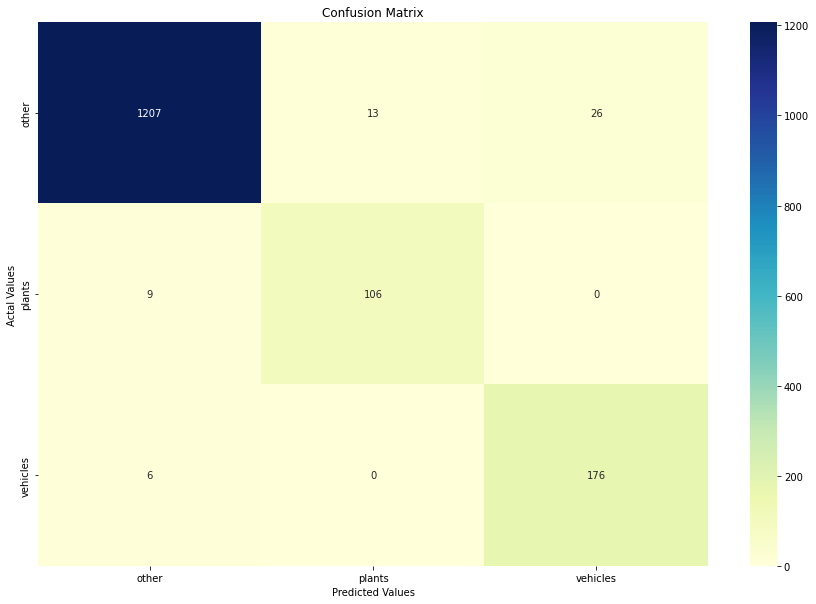

In [ ]:
#Визуализируем confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
# посчитаем f1-score
from sklearn.metrics import f1_score, classification_report
f1_score(all_true_labels, all_pred_labels, average = 'weighted')

0.965495014091646